# Fashion Recommendation System

In [1]:
#Extracting dataset
'''
from zipfile import ZipFile
import os

zip_file_name = "women-fashion.zip"
extraction_directory = './data/women_fashion'

print(os.path)

if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)
    
with ZipFile(zip_file_name,'r') as zip_ref:
    zip_ref.extractall(extraction_directory)
    
extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])'''  # Already extracted so am not using this code

'\nfrom zipfile import ZipFile\nimport os\n\nzip_file_name = "women-fashion.zip"\nextraction_directory = \'./data/women_fashion\'\n\nprint(os.path)\n\nif not os.path.exists(extraction_directory):\n    os.makedirs(extraction_directory)\n    \nwith ZipFile(zip_file_name,\'r\') as zip_ref:\n    zip_ref.extractall(extraction_directory)\n    \nextracted_files = os.listdir(extraction_directory)\nprint(extracted_files[:10])'

In [2]:
#Correcting the path to include the 'women fashion' directory and listing contents
import os

extraction_directory = './data/women_fashion'
if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)
extraction_directory_updated = os.path.join(extraction_directory,'women fashion')

#list the files 
extracted_files_updated = os.listdir(extraction_directory_updated)
extracted_files_updated[:10],len(extracted_files_updated)

(['anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg',
  'Anarkali suit with a modern twist.jpg',
  'Anarkali suit with fitted bodice with a high neckline.jpg',
  'anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg',
  'anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg',
  'ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg',
  'Banarasi-Silk-Woven-Saree-In-Parrot-Green-Colour-SR1357109-A.webp',
  'beige top adorned with black dots and a green skirt.jpg',
  'black and white gingham checkered A-line dress with a flared skirt.jpg',
  'black double-breasted blazer with gold buttons, paired with a mid-length skirt.jpg'],
 96)

### Display first image

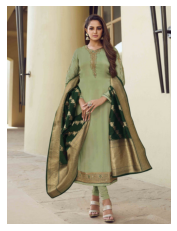

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

#function to load and display an image
def display_image(file_path):
    image = Image.open(file_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
# To understand first image characteristics
first_image_path = os.path.join(extraction_directory_updated,extracted_files_updated[0])
display_image(first_image_path)

### Creating List of all Image File Paths

In [4]:
import glob

#directory path containing images
image_directory = './data/women_fashion/women fashion'

image_paths_list = [file for file in glob.glob(os.path.join(image_directory,'*.*')) 
                    if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]
print(image_paths_list)
print("Number of images: ",len(image_paths_list))

['./data/women_fashion/women fashion\\anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg', './data/women_fashion/women fashion\\Anarkali suit with a modern twist.jpg', './data/women_fashion/women fashion\\Anarkali suit with fitted bodice with a high neckline.jpg', './data/women_fashion/women fashion\\anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg', './data/women_fashion/women fashion\\anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg', './data/women_fashion/women fashion\\ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg', './data/women_fashion/women fashion\\Banarasi-Silk-Woven-Saree-In-Parrot-Green-Colour-SR1357109-A.webp', './data/women_fashion/women fashion\\beige top adorned with black dots and a green skirt.jpg', './data/women_fashion/women fashion\\black and white gingham 

### Extract Features from All Images

In [5]:
import tensorflow as tf

In [6]:
#Standard and required imports
from tensorflow.keras.preprocessing import image


In [7]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd

In [8]:
base_model = VGG16(weights='imagenet',include_top=False)
model = Model(inputs=base_model.input,outputs=base_model.output)

def preprocess_image(img_path):
    img = image.load_img(img_path,target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array,axis=0)
    return preprocess_input(img_array_expanded)

def extract_features(model,preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features/np.linalg.norm(flattened_features)
    return normalized_features

all_features = []
all_image_names = []

for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model,preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

1/1 [==============================] - 0s 292ms/step


In [9]:
all_features

[array([0.        , 0.        , 0.        , ..., 0.        , 0.00049293,
        0.        ], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.00020819,
        0.        ], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0.        , 0.00236599, 0.        , ..., 0.        , 0.00562013,
        0.00019365], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.00762429,
        0.        ], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.00561854,
 

In [10]:
all_image_names

['anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg',
 'Anarkali suit with a modern twist.jpg',
 'Anarkali suit with fitted bodice with a high neckline.jpg',
 'anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg',
 'anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg',
 'ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg',
 'Banarasi-Silk-Woven-Saree-In-Parrot-Green-Colour-SR1357109-A.webp',
 'beige top adorned with black dots and a green skirt.jpg',
 'black and white gingham checkered A-line dress with a flared skirt.jpg',
 'black double-breasted blazer with gold buttons, paired with a mid-length skirt.jpg',
 'black dress with lace detailing.jpg',
 'black dress with sparkling details.jpg',
 'black floral saree.jpg',
 'black jumpsuit with a diagonal stripe of glittering material running

### Recommending Fashion Images

In [11]:
from scipy.spatial.distance import cosine

In [12]:
def recommend_fashion_items_cnn(input_image_path,all_features,all_images_names,model,top_n=5):
    #preprocess the input image and extract features
    preprocessed_img = preprocess_image(input_image_path)
    #print(preprocessed_img)
    input_features = extract_features(model,preprocessed_img)
    #print(input_features)
    
    #calculates similarities and find the Top N similar images
    similarities = [1 - cosine(input_features,other_features) for other_features in all_features]
    #print("Similarities:",similarities)
    similar_indices = np.argsort(similarities)[-top_n:]
    #print(similar_indices)
    
    #print(all_images_names)
    print(input_image_path)
    #print(all_image_names.index(input_image_path))
    input_image = input_image_path.split('/')[-1]
    #print(input_image)
    #print(type(input_image))
    #print(all_image_names.index(input_image))
    
    
    #filter out the input image index from similar_indices
    similar_indices = [idx for idx in similar_indices if idx != all_image_names.index(input_image)]
    #print(similar_indices)
    
    
    #display the input image
    plt.figure(figsize=(15,10))
    plt.subplot(1,top_n+1,1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')
    plt.show()
    
    #display similar images
    for i,idx in enumerate(similar_indices[:top_n],start=1):
        image_path = os.path.join('./data/women_fashion/women fashion',all_image_names[idx])
        #print(image_path)
        plt.figure(figsize=(15,10))
        plt.subplot(1,top_n + 1,i+1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')
        
    plt.tight_layout()
    plt.show()

1/1 [==============================] - 0s 273ms/step
./data/women_fashion/women fashion/Banarasi-Silk-Woven-Saree-In-Parrot-Green-Colour-SR1357109-A.webp


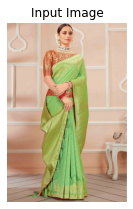

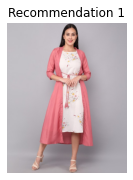

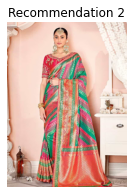

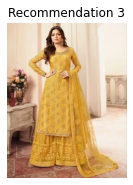

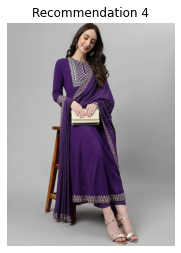

In [13]:
input_image_path = './data/women_fashion/women fashion/Banarasi-Silk-Woven-Saree-In-Parrot-Green-Colour-SR1357109-A.webp'
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=5)